# Tanaka Corpus

The Tanaka Corpus (CC-0) includes hundreds of English and Japanese sentences with translations between. This is a good mechanism to measure the compression of cl100k_base for both languages.

In [8]:
%pip install pandas matplotlib tiktoken

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/26/5a/27fd341e4510257789f19a4b4be8bb90d1113b8f176c3dab562b4f21466e/matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/ca/2a/d197a412ec474391ee878b1218cf2fe9c6e963903755887fc5654c06636a/contourpy-1.2.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/65/cf/491fe771ed235947f55a997435491cb4db314bdd55c250d21e301c774a9c/fonttools-4.48.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/162.2 kB ? eta -:--:--
     -------------------------------------- 162.2/162.2 kB 4.9 MB/s e


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import tiktoken
enc = tiktoken.get_encoding("cl100k_base")

indices = pd.read_csv('data/jpn_indices.tsv', sep='\t', header=None, names=['jpn_idx', 'eng_idx', 'comment'])
sentences_jpn = pd.read_csv('data/jpn_sentences.tsv', sep='\t', header=None, names=['jpn_idx', 'lang', 'jpn_sentence'],)
sentences_eng = pd.read_csv('data/eng_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'lang', 'eng_sentence'])
sentences = sentences_jpn.merge(indices, on='jpn_idx')
sentences = sentences.merge(sentences_eng, on='eng_idx')


sentences.head(5)

C:\Users\anthonyshaw\AppData\Local\Temp\ipykernel_25300\776488778.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,jpn_idx,lang_x,jpn_sentence,eng_idx,comment,lang_y,eng_sentence
0,1297,jpn,きみにちょっとしたものをもってきたよ。,4724,君(きみ){きみ} に 一寸した{ちょっとした} 物(もの){もの} を 持って来る{もって...,eng,I brought you a little something.
1,4702,jpn,何かしてみましょう。,1276,何か 為る(する){して} 見る{みましょう},eng,Let's try something.
2,4703,jpn,私は眠らなければなりません。,1009343,私(わたし) は 眠る{眠ら} ねばならない{なければなりません},eng,I have to sleep.
3,4704,jpn,何してるの？,16492,何 為る(する){してる} の,eng,What are you doing?
4,4705,jpn,今日は６月１８日で、ムーリエルの誕生日です！,1280,今日 は 六月{６月} １８日 で(#2028980) の 誕生日 です,eng,Today is June 18th and it is Muiriel's birthday!


In [5]:
# Add a column to the sentences dataframe which is the result of len(enc.decode(x)) where x is the value of the eng_sentence column
sentences['eng_sentence_length'] = sentences['eng_sentence'].apply(lambda x: len(x))
sentences['jpn_sentence_length'] = sentences['jpn_sentence'].apply(lambda x: len(x))
sentences['eng_sentence_token_length'] = sentences['eng_sentence'].apply(lambda x: len(enc.encode(x)))
sentences['jpn_sentence_token_length'] = sentences['jpn_sentence'].apply(lambda x: len(enc.encode(x)))

sentences.head(5)

,jpn_idx,lang_x,jpn_sentence,eng_idx,comment,lang_y,eng_sentence,eng_sentence_length,jpn_sentence_length,eng_sentence_token_length,jpn_sentence_token_length
0,1297,jpn,きみにちょっとしたものをもってきたよ。,4724,君(きみ){きみ} に 一寸した{ちょっとした} 物(もの){もの} を 持って来る{もって...,eng,I brought you a little something.,33,19,7,18
1,4702,jpn,何かしてみましょう。,1276,何か 為る(する){して} 見る{みましょう},eng,Let's try something.,20,10,5,10
2,4703,jpn,私は眠らなければなりません。,1009343,私(わたし) は 眠る{眠ら} ねばならない{なければなりません},eng,I have to sleep.,16,14,5,15
3,4704,jpn,何してるの？,16492,何 為る(する){してる} の,eng,What are you doing?,19,6,5,5
4,4705,jpn,今日は６月１８日で、ムーリエルの誕生日です！,1280,今日 は 六月{６月} １８日 で(#2028980) の 誕生日 です,eng,Today is June 18th and it is Muiriel's birthday!,48,22,15,22


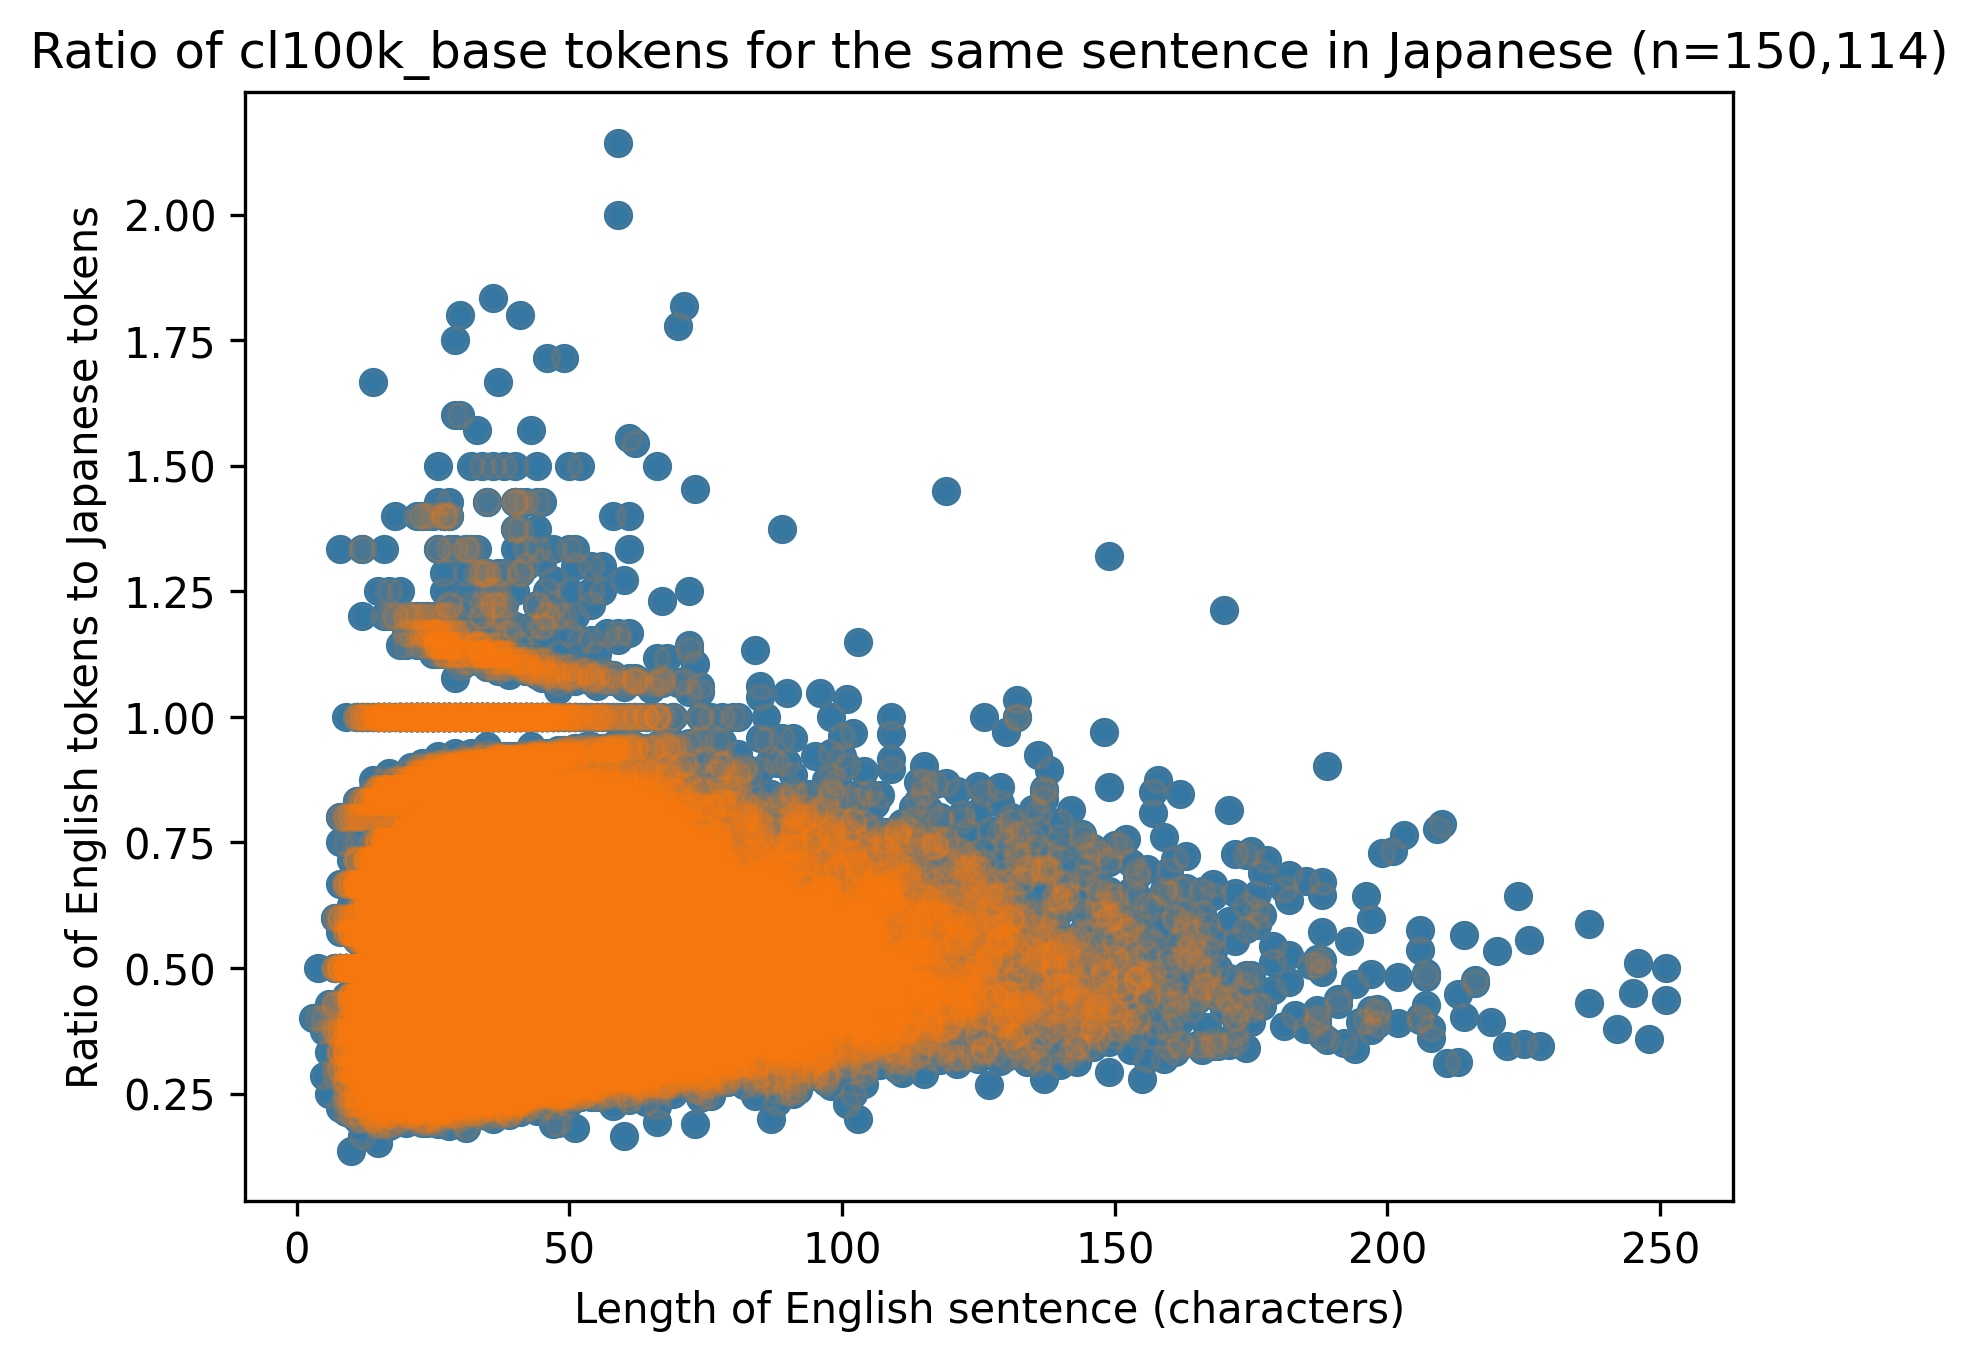

In [13]:
# Calculate a ratio of the tokens in the English sentence to the tokens in the Japanese sentence
sentences['eng_jpn_token_ratio'] = sentences['jpn_sentence_token_length'] / sentences['eng_sentence_token_length']

# Draw a plot to show the relationship between the length of the English sentence and the ratio of the tokens in the English sentence to the tokens in the Japanese sentence
import matplotlib.pyplot as plt
plt.scatter(sentences['eng_sentence_length'], sentences['eng_jpn_token_ratio'])
plt.xlabel('Length of English sentence (characters)')
plt.ylabel('Ratio of Japanese tokens to English tokens')
# Make the dots a bit transparent so we can see where they overlap
plt.scatter(sentences['eng_sentence_length'], sentences['eng_jpn_token_ratio'], alpha=0.1)
# Increase the resolution of the chart
plt.gcf().set_dpi(300)
# Add a title 
plt.title('Ratio of cl100k_base tokens for the same sentence in Japanese (n=150,114)')
plt.show()

In [10]:
# What is the mean of the ratio of the tokens in the English sentence to the tokens in the Japanese sentence?
sentences['eng_jpn_token_ratio'].mean()

0.48892318840735227